In [ ]:
import pandas as pd
import numpy as np
# read csv as df
path = "/content/drive/MyDrive/FTX_BTCUSDT_1h.csv"
# df takes price and volume data
df = pd.read_csv(path)
# 9mo
df = df[6000::-1].reset_index(drop=True)
df = df.drop(['symbol', 'unix'], axis = 1)
df

,date,open,high,low,close,Volume BTC,Volume USDT
0,19-01-2021 00:00,36641.0,36934.0,36389.0,36673.0,21.428421,7.858445e+05
1,19-01-2021 01:00,36673.0,37310.0,36658.0,36930.0,127.378466,4.704087e+06
2,19-01-2021 02:00,36930.0,37019.0,36602.0,36822.0,52.259031,1.924282e+06
3,19-01-2021 03:00,36820.0,36850.0,36421.0,36480.0,57.070706,2.081939e+06
4,19-01-2021 04:00,36480.0,36662.0,36260.0,36306.0,69.217650,2.513016e+06
...,...,...,...,...,...,...,...
5996,25-09-2021 20:00,42666.0,42813.0,42537.0,42647.0,78.588568,3.351567e+06
5997,25-09-2021 21:00,42647.0,42722.0,42381.0,42684.0,93.427257,3.987849e+06
5998,25-09-2021 22:00,42684.0,42789.0,42585.0,42722.0,62.880118,2.686364e+06
5999,25-09-2021 23:00,42722.0,42808.0,42586.0,42680.0,49.732948,2.122602e+06


In [ ]:
# Adds technical indicators to the existing dataframe

def ti(df):
        
        # Simple moving average (SMA)
        df['SMA_5'] = df['close'].transform(lambda x: x.rolling(window = 5).mean())
        df['SMA_15'] = df['close'].transform(lambda x: x.rolling(window = 15).mean())
        df['SMA_ratio'] = df['SMA_15'] / df['SMA_5']
        
        # SMA-V(voulume)
        df['SMA5_Volume'] = df['Volume BTC'].transform(lambda x: x.rolling(window = 5).mean())
        df['SMA15_Volume'] = df['Volume BTC'].transform(lambda x: x.rolling(window = 15).mean())
        df['SMA_Volume_Ratio'] = df['SMA5_Volume']/df['SMA15_Volume']
        
        # Stochastic Osclillator 
        df['Lowest_5D'] = df['low'].transform(lambda x: x.rolling(window = 5).min())
        df['High_5D'] = df['high'].transform(lambda x: x.rolling(window = 5).max())
        df['Lowest_15D'] = df['low'].transform(lambda x: x.rolling(window = 15).min())
        df['High_15D'] = df['high'].transform(lambda x: x.rolling(window = 15).max())

        df['Stochastic_5'] = ((df['close'] - df['Lowest_5D'])/(df['High_5D'] - df['Lowest_5D']))*100
        df['Stochastic_15'] = ((df['close'] - df['Lowest_15D'])/(df['High_15D'] - df['Lowest_15D']))*100

        df['Stochastic_%D_5'] = df['Stochastic_5'].rolling(window = 5).mean()
        df['Stochastic_%D_15'] = df['Stochastic_5'].rolling(window = 15).mean()

        df['Stochastic_Ratio'] = df['Stochastic_%D_5']/df['Stochastic_%D_15']
        
        # Moving Average Convergence Divergence (MACD)
        df['5Ewm'] = df['close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
        df['15Ewm'] = df['close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
        df['MACD'] = df['15Ewm'] - df['5Ewm']
        
        return df

In [ ]:
ti(df)
df

,date,open,high,low,close,Volume BTC,Volume USDT,SMA_5,SMA_15,SMA_ratio,...,Lowest_15D,High_15D,Stochastic_5,Stochastic_15,Stochastic_%D_5,Stochastic_%D_15,Stochastic_Ratio,5Ewm,15Ewm,MACD
0,19-01-2021 00:00,36641.0,36934.0,36389.0,36673.0,21.428421,7.858445e+05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36673.000000,36673.000000,0.000000
1,19-01-2021 01:00,36673.0,37310.0,36658.0,36930.0,127.378466,4.704087e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36758.666667,36705.125000,-53.541667
2,19-01-2021 02:00,36930.0,37019.0,36602.0,36822.0,52.259031,1.924282e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36779.777778,36719.734375,-60.043403
3,19-01-2021 03:00,36820.0,36850.0,36421.0,36480.0,57.070706,2.081939e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36679.851852,36689.767578,9.915726
4,19-01-2021 04:00,36480.0,36662.0,36260.0,36306.0,69.217650,2.513016e+06,36642.2,NaN,NaN,...,NaN,NaN,4.380952,NaN,NaN,NaN,NaN,36555.234568,36641.796631,86.562063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,25-09-2021 20:00,42666.0,42813.0,42537.0,42647.0,78.588568,3.351567e+06,42625.2,42572.666667,0.998768,...,41661.0,42968.0,64.069264,75.439939,70.733592,63.608410,1.112016,42619.930874,42590.820224,-29.110650
5997,25-09-2021 21:00,42647.0,42722.0,42381.0,42684.0,93.427257,3.987849e+06,42635.6,42568.333333,0.998422,...,41661.0,42968.0,70.138889,78.270849,69.220605,63.032162,1.098179,42641.287249,42602.467696,-38.819553
5998,25-09-2021 22:00,42684.0,42789.0,42585.0,42722.0,62.880118,2.686364e+06,42660.6,42591.600000,0.998383,...,41661.0,42968.0,78.935185,81.178271,70.631602,66.759216,1.058005,42668.191500,42617.409234,-50.782265
5999,25-09-2021 23:00,42722.0,42808.0,42586.0,42680.0,49.732948,2.122602e+06,42679.8,42593.400000,0.997976,...,42165.0,42968.0,69.212963,64.134496,71.522108,65.907849,1.085183,42672.127666,42625.233080,-46.894586


In [ ]:
df = df.drop(['Volume USDT', 'SMA_5', 'SMA_15', 'SMA5_Volume', 'SMA15_Volume', 'Lowest_5D', 'High_5D', 
              'Lowest_15D', 'High_15D', 'Stochastic_5', 'Stochastic_15', 'Stochastic_%D_5', 'Stochastic_%D_15', '5Ewm', '15Ewm'], axis = 1)

In [ ]:
df

,date,open,high,low,close,Volume BTC,SMA_ratio,SMA_Volume_Ratio,Stochastic_Ratio,MACD
0,19-01-2021 00:00,36641.0,36934.0,36389.0,36673.0,21.428421,NaN,NaN,NaN,0.000000
1,19-01-2021 01:00,36673.0,37310.0,36658.0,36930.0,127.378466,NaN,NaN,NaN,-53.541667
2,19-01-2021 02:00,36930.0,37019.0,36602.0,36822.0,52.259031,NaN,NaN,NaN,-60.043403
3,19-01-2021 03:00,36820.0,36850.0,36421.0,36480.0,57.070706,NaN,NaN,NaN,9.915726
4,19-01-2021 04:00,36480.0,36662.0,36260.0,36306.0,69.217650,NaN,NaN,NaN,86.562063
...,...,...,...,...,...,...,...,...,...,...
5996,25-09-2021 20:00,42666.0,42813.0,42537.0,42647.0,78.588568,0.998768,0.766048,1.112016,-29.110650
5997,25-09-2021 21:00,42647.0,42722.0,42381.0,42684.0,93.427257,0.998422,0.741962,1.098179,-38.819553
5998,25-09-2021 22:00,42684.0,42789.0,42585.0,42722.0,62.880118,0.998383,0.737640,1.058005,-50.782265
5999,25-09-2021 23:00,42722.0,42808.0,42586.0,42680.0,49.732948,0.997976,0.811930,1.085183,-46.894586


In [ ]:
# Getting data ready to be fed to the RL agent

from pandas import read_csv
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler

df = df.dropna()
# scale the data
scaler = MinMaxScaler()
df[['SMA_ratio',	'SMA_Volume_Ratio',	'Stochastic_Ratio',	'MACD']]= scaler.fit_transform(df[['SMA_ratio',	'SMA_Volume_Ratio',	'Stochastic_Ratio',	'MACD']])
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,date,open,high,low,close,Volume BTC,SMA_ratio,SMA_Volume_Ratio,Stochastic_Ratio,MACD
18,19-01-2021 18:00,37163.0,37163.0,36483.0,36495.0,30.653985,0.486774,0.249724,0.388631,0.462997
19,19-01-2021 19:00,36495.0,36744.0,36054.0,36269.0,124.037257,0.515484,0.385925,0.319053,0.497388
20,19-01-2021 20:00,36269.0,36570.0,36107.0,36444.0,28.287466,0.554347,0.385493,0.180172,0.507255
21,19-01-2021 21:00,36444.0,36768.0,36393.0,36458.0,15.713258,0.590809,0.318791,0.115925,0.510439
22,19-01-2021 22:00,36458.0,36773.0,36326.0,36642.0,7.405865,0.605132,0.363323,0.168900,0.501109
...,...,...,...,...,...,...,...,...,...,...
5996,25-09-2021 20:00,42666.0,42813.0,42537.0,42647.0,78.588568,0.502470,0.257131,0.493922,0.455349
5997,25-09-2021 21:00,42647.0,42722.0,42381.0,42684.0,93.427257,0.499860,0.247623,0.486583,0.453023
5998,25-09-2021 22:00,42684.0,42789.0,42585.0,42722.0,62.880118,0.499560,0.245917,0.465275,0.450157
5999,25-09-2021 23:00,42722.0,42808.0,42586.0,42680.0,49.732948,0.496483,0.275244,0.479690,0.451089


In [ ]:
df['ti_Score'] = df[['SMA_ratio','SMA_Volume_Ratio','MACD']].sum(axis=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
df[['ti_Score']] = scaler.fit_transform(df[['ti_Score']])
df[['open_scaled']] = scaler.fit_transform(df[['open']])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,date,open,high,low,close,Volume BTC,SMA_ratio,SMA_Volume_Ratio,Stochastic_Ratio,MACD,ti_Score,open_scaled
18,19-01-2021 18:00,37163.0,37163.0,36483.0,36495.0,30.653985,0.486774,0.249724,0.388631,0.462997,-0.280825,-0.551883
19,19-01-2021 19:00,36495.0,36744.0,36054.0,36269.0,124.037257,0.515484,0.385925,0.319053,0.497388,-0.118985,-0.589688
20,19-01-2021 20:00,36269.0,36570.0,36107.0,36444.0,28.287466,0.554347,0.385493,0.180172,0.507255,-0.079766,-0.602479
21,19-01-2021 21:00,36444.0,36768.0,36393.0,36458.0,15.713258,0.590809,0.318791,0.115925,0.510439,-0.101735,-0.592575
22,19-01-2021 22:00,36458.0,36773.0,36326.0,36642.0,7.405865,0.605132,0.363323,0.168900,0.501109,-0.061519,-0.591782
...,...,...,...,...,...,...,...,...,...,...,...,...
5996,25-09-2021 20:00,42666.0,42813.0,42537.0,42647.0,78.588568,0.502470,0.257131,0.493922,0.455349,-0.268275,-0.240443
5997,25-09-2021 21:00,42647.0,42722.0,42381.0,42684.0,93.427257,0.499860,0.247623,0.486583,0.453023,-0.280004,-0.241518
5998,25-09-2021 22:00,42684.0,42789.0,42585.0,42722.0,62.880118,0.499560,0.245917,0.465275,0.450157,-0.283960,-0.239424
5999,25-09-2021 23:00,42722.0,42808.0,42586.0,42680.0,49.732948,0.496483,0.275244,0.479690,0.451089,-0.261887,-0.237273


the plot shows that the ti_Score is a good indicator of open price. It is able to predict the trend a little bit in advance

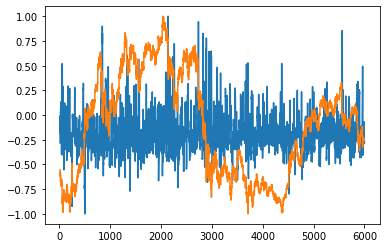

In [ ]:
import matplotlib.pyplot as plt

# df[['open_scaled']] = scaler.fit_transform(df[['open']])
df['ti_Score'].T.plot(kind='line')
df['open_scaled'].T.plot(kind = 'line')
plt.show()

In [ ]:

import random
from collections import deque

class CustomEnv:
    # A custom Bitcoin trading environment
    def __init__(self, df, initial_balance, lookback_window_size=50):
        # Define action space and state size and other custom parameters
        self.df = df.dropna().reset_index()
        self.df_total_steps = len(self.df)-1
        self.initial_balance = initial_balance
        self.lookback_window_size = lookback_window_size

        # Action space from 0 to 3, 0 is hold, 1 is buy, 2 is sell
        self.action_space = np.array([0, 1, 2])

        # Orders history contains the balance, net_worth, crypto_bought, crypto_sold, crypto_held values for the last lookback_window_size steps
        self.orders_history = deque(maxlen=self.lookback_window_size)
        
        # Market history contains the OHCL values for the last lookback_window_size prices
        self.market_history = deque(maxlen=self.lookback_window_size)

        # State size contains Market+Orders history for the last lookback_window_size steps
        self.state_size = (self.lookback_window_size, 10)
    
    def ti_score(self):
        ti_df = self.df[['SMA_ratio','SMA_Volume_Ratio','MACD']]
        score = df["sum"] = df. sum(axis=1)
        ti_df.sum(axis = 1, skipna = True)


    def reset(self, env_steps_size = 0):
          self.balance = self.initial_balance
          self.net_worth = self.initial_balance
          self.prev_net_worth = self.initial_balance
          self.crypto_held = 0
          self.crypto_sold = 0
          self.crypto_bought = 0
          if env_steps_size > 0: # used for training dataset
            self.start_step = random.randint(self.lookback_window_size, self.df_total_steps - env_steps_size)
            self.end_step = self.start_step + env_steps_size
          else: # used for testing dataset
            self.start_step = self.lookback_window_size+env_steps_size
            self.end_step = self.df_total_steps

          self.current_step = self.start_step

          for i in reversed(range(self.lookback_window_size)):
            current_step = self.current_step - i
            self.orders_history.append([self.balance, self.net_worth, self.crypto_bought, self.crypto_sold, self.crypto_held])
            self.market_history.append([self.df.loc[current_step, 'open'],
                                    self.df.loc[current_step, 'high'],
                                    self.df.loc[current_step, 'low'],
                                    self.df.loc[current_step, 'close'],
                                    self.df.loc[current_step, 'Volume BTC']
                                    ])

          state = np.concatenate((self.market_history, self.orders_history), axis=1)
          return state

    # Execute one time step within the environment
    def step(self, action, net_worth, balance):

          self.balance = balance
          self.crypto_bought = 0
          self.crypto_sold = 0
          self.current_step += 1
          # self.lookback_window_size = 5
          

          # Set the current price to a random price between open and close
          current_price = self.df.loc[self.current_step, 'open']
          """current_price = random.uniform(
          self.df.loc[self.current_step, 'open'],
          self.df.loc[self.current_step, 'close'])"""
          #print("open,close={},{}".format(self.df.loc[self.current_step, 'price'],
                                     #self.df.loc[self.current_step+1, 'price']))
          #print("current_price = {}".format(current_price))                

          
          if action == 0: # Hold
            pass

          elif action == 1 and self.balance > 0:
            # Buy with 50% of current balance
            self.crypto_bought =(self.balance*.5)/ current_price
            self.balance = (self.balance)*.5
            self.crypto_held = self.crypto_held + self.crypto_bought

          elif action == 2 and self.crypto_held>0:
            # Sell 80% of current crypto held
            self.crypto_sold = (self.crypto_held*.7)
            self.balance = (self.balance) + (self.crypto_sold * current_price)
            self.crypto_held = self.crypto_held - self.crypto_sold


          self.prev_net_worth = net_worth
          self.net_worth = self.balance + (self.crypto_held * current_price)
          self.orders_history.append([self.balance, self.net_worth, self.crypto_bought, self.crypto_sold, self.crypto_held])

          # Calculate reward
          reward = self.net_worth - self.prev_net_worth
          #print("reward ({})= self.net_worth({}) - self.prev_net_worth({})".format(reward,self.net_worth,self.prev_net_worth))
          
          if self.net_worth <= self.prev_net_worth/2:
            done = True
          else:
            done = False

          obs = self._next_observation()

          return obs, reward, done, self.current_step, self.net_worth, self.balance
 

# Execute one time step within the environment
    def policy_step(self, action, net_worth, balance):

          self.balance = balance
          self.crypto_bought = 0
          self.crypto_sold = 0
          self.current_step += 1
          self.lookback_window_size = 5
          

          # Set the current price to a random price between open and close
          current_price = self.df.loc[self.current_step, 'open']
          """current_price = random.uniform(
          self.df.loc[self.current_step, 'open'],
          self.df.loc[self.current_step, 'close'])"""
          #print("open,close={},{}".format(self.df.loc[self.current_step, 'price'],
                                     #self.df.loc[self.current_step+1, 'price']))
          #print("current_price = {}".format(current_price))

          if self.df['ti_Score'].iloc[self.current_step]>0.2:
                action = 1
                #print("ti_Score = {}".format(self.df['ti_Score'].iloc[self.current_step-self.lookback_window_size]))
                #print("Action = {}".format(action))
          elif self.df['ti_Score'].iloc[self.current_step]<-0.2:
                action = -1
                #print("ti_score = {}".format(self.df['ti_Score'].iloc[self.current_step-self.lookback_window_size]))
                #print("Action = {}".format(action))
          else:
                action = 0
                #print("score = {}".format(self.df['ti_Score'].iloc[self.current_step-self.lookback_window_size]))
                #print("Action = {}".format(action))
                

          
          if action == 0: # Hold
            pass

          elif action == 1 and self.balance > 0:
            # Buy with 50% of current balance
            self.crypto_bought =(self.balance*.5)/ current_price
            self.balance = (self.balance)*.5
            self.crypto_held = self.crypto_held + self.crypto_bought

          elif action == 2 and self.crypto_held>0:
            # Sell 80% of current crypto held
            self.crypto_sold = (self.crypto_held*.7)
            self.balance = (self.balance) + (self.crypto_sold * current_price)
            self.crypto_held = self.crypto_held - self.crypto_sold


          self.prev_net_worth = net_worth
          self.net_worth = self.balance + (self.crypto_held * current_price)
          self.orders_history.append([self.balance, self.net_worth, self.crypto_bought, self.crypto_sold, self.crypto_held])

          # Calculate reward
          reward = self.net_worth - self.prev_net_worth
          
          if self.net_worth <= self.prev_net_worth/2:
            done = True
          else:
            done = False

          obs = self._next_observation()

          return obs, reward, done, self.current_step, self.net_worth, self.balance


    # Get the data points for the given current_step
    def _next_observation(self):
        self.market_history.append([self.df.loc[self.current_step, 'open'],
                                self.df.loc[self.current_step, 'high'],
                                self.df.loc[self.current_step, 'low'],
                                self.df.loc[self.current_step, 'close'],
                                self.df.loc[self.current_step, 'Volume BTC']
                                ])
        obs = np.concatenate((self.market_history, self.orders_history), axis=1)
        return obs

    # render environment
    def render(self):
        print(f'Step: {self.current_step}, Net Worth: {self.net_worth}')


In [ ]:
def random_game(env, train_episodes = 10, training_batch_size = 200):
    print("train_episodes={}".format(train_episodes))
    average_net_worth = 0
    rewards_list = []
    action_list = []
    action = 0
    initial_balance = 1000
    for episode in range(train_episodes):
        state = env.reset(env_steps_size = training_batch_size)
        state, reward, done, current_step, net_worth, balance= env.step(action, initial_balance, initial_balance)

        

        while True:
            #env.render()
            
            action = np.random.randint(3, size=1)[0]

            state, reward, done, current_step, net_worth, balance = env.step(action, net_worth, balance)
            action_list.append(action)
            rewards_list.append(reward)

            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                print("net_worth:", env.net_worth)
                break

    """print("action_list = {}".format(action_list))
    print("reward_list = {}".format(rewards_list))"""
    sum_rewards = (sum(rewards_list)/train_episodes)
    print("sum of rewards(profit) = {}".format((sum(rewards_list)/train_episodes)))
    print("average_net_worth:", average_net_worth/train_episodes)

    return  sum_rewards
    

In [ ]:
def reward_based_games(env, train_episodes = 10, training_batch_size=200):
    average_net_worth = 0
    rewards_list = []
    action_list = []
    action = 0
    initial_balance = 1000
    for episode in range(train_episodes):
        state = env.reset(env_steps_size = training_batch_size)
        state, reward, done, current_step, net_worth, balance= env.step(action, initial_balance, initial_balance)
        
        while True:
            #env.render()
            state, reward, done, current_step, net_worth, balance = env.step(action, net_worth, balance)
            action_list.append(action)
            rewards_list.append(reward)
            
            
            if current_step == len(df)-730:
              break
           
            if rewards_list[episode]>rewards_list[episode-1] :
              action = action_list[episode-1]
            else:
              action = np.random.randint(3, size=1)[0]

            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                print("net_worth:", env.net_worth)
                break


    sum_rewards = (sum(rewards_list)/train_episodes)
    print("sum of rewards(profit) = {}".format(sum_rewards))
    print("average_net_worth:", average_net_worth/train_episodes)

    return  sum_rewards


In [ ]:
# takes action based on the ti score

def policy_based_game(env, train_episodes = 10, training_batch_size=500):
    average_net_worth = 0
    rewards_list = []
    action_list = []
    action = 0
    initial_balance = 1000
    for episode in range(train_episodes):
        state = env.reset(env_steps_size = training_batch_size)
        state, reward, done, current_step, net_worth, balance= env.policy_step(action, initial_balance, initial_balance)        

        while True:
            #env.render()
            state, reward, done, current_step, net_worth, balance = env.policy_step(action, net_worth, balance)
            
            
            if current_step == len(df)-730:
              break
            action_list.append(action)
            
            rewards_list.append(reward)
           
           
            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                print("net_worth:", env.net_worth)
                break

    print("action_list = {}".format(action_list))
    sum_rewards = sum(rewards_list)/train_episodes
    print("sum of rewards(profit) = {}".format(sum_rewards))
    print("average_net_worth:", average_net_worth/train_episodes)

    return  sum_rewards


In [ ]:
# takes action based on the ti score

def policy_based_game(env, train_episodes = 10, training_batch_size=500):
    average_net_worth = 0
    rewards_list = []
    action_list = []
    action = 0
    initial_balance = 1000
    for episode in range(train_episodes):
        state = env.reset(env_steps_size = training_batch_size)
        state, reward, done, current_step, net_worth, balance= env.policy_step(action, initial_balance, initial_balance)

        while True:
            #env.render()
            state, reward, done, current_step, net_worth, balance = env.policy_step(action, net_worth, balance)
            
            
            if current_step == len(df)-730:
              break
            action_list.append(action)
            
            rewards_list.append(reward)
           
           
            if env.current_step == env.end_step:
                average_net_worth += env.net_worth
                print("net_worth:", env.net_worth)
                break

    sum_rewards = sum(rewards_list)/train_episodes
    print("sum of rewards(profit) = {}".format(sum_rewards))
    print("average_net_worth:", average_net_worth/train_episodes)

    return  sum_rewards


In [ ]:
#initialising
import numpy as np

lookback_window_size = 5
train_df = df[:-5600-lookback_window_size]
test_df = df[-5600-lookback_window_size:] 

train_env = CustomEnv(train_df, initial_balance = 1000, lookback_window_size=lookback_window_size)
test_env = CustomEnv(test_df, initial_balance = 1000, lookback_window_size=lookback_window_size)

In [ ]:
# run all strategies
random_game(train_env, train_episodes = 10, training_batch_size=200)
reward_based_games(train_env, train_episodes = 10, training_batch_size=200)
policy_based_game(train_env, train_episodes = 10, training_batch_size=200)


train_episodes=10
net_worth: 1070.9618491649112
net_worth: 970.1576933585966
net_worth: 1030.6836217738762
net_worth: 989.6139594115313
net_worth: 1044.1299462306579
net_worth: 955.5540082391867
net_worth: 1179.286646556281
net_worth: 980.8589171350438
net_worth: 1086.9452069583929
net_worth: 1120.2561988870516
sum of rewards(profit) = 42.84480477155292
average_net_worth: 1042.8448047715528
net_worth: 1011.9311940311425
net_worth: 1013.9139909839034
net_worth: 908.0260489375198
net_worth: 1000.0
net_worth: 1000.0
net_worth: 1106.24597718856
net_worth: 1118.2591835617304
net_worth: 1135.2209724250765
net_worth: 1091.2488740901647
net_worth: 1047.327436291196
sum of rewards(profit) = 43.21736775092931
average_net_worth: 1043.2173677509293
net_worth: 1228.3031258534431
net_worth: 969.0781860501138
net_worth: 1216.4307145250673
net_worth: 1146.2477245800992
net_worth: 1025.4564250452288
net_worth: 1154.1452541928245
net_worth: 1125.7088315951785
net_worth: 1073.565280733902
net_worth: 1058

107.89632565021077

In [ ]:
len(df[:-5250-lookback_window_size])/24   # number of days

30.333333333333332

In [ ]:
# comparison of net profits (NP) from all 3 games

def compare(iterations):

  rewards_random = []
  rewards_reward = []
  rewards_policy = []

  # plt.plot(rewards_random, rewards_reward, rewards_policy )
  lookback_window_size = 5
  train_df = df[:-5250-lookback_window_size]
  test_df = df[-5250-lookback_window_size:] # 30 days

  train_env = CustomEnv(train_df,1000, lookback_window_size=lookback_window_size)
  test_env = CustomEnv(test_df, 1000, lookback_window_size=lookback_window_size)

  

  for i in range(iterations):
    
    NP_random = random_game(train_env, train_episodes = 10, training_batch_size=200)
    rewards_random.append(NP_random)

    NP_reward = reward_based_games(train_env, train_episodes = 10, training_batch_size=200)
    rewards_reward.append(NP_reward)

    NP_policy = policy_based_game(train_env, train_episodes = 10, training_batch_size=200)
    rewards_policy.append(NP_policy)

  plt.plot(rewards_random, label = "rewards_random" )
  plt.plot(rewards_reward, label = "rewards_reward")
  plt.plot(rewards_policy, label = "rewards_policy")
  plt.legend()
  plt.show() 

  return rewards_random, rewards_reward, rewards_policy



train_episodes=10
net_worth: 1156.8553225882897
net_worth: 987.9115813723672
net_worth: 1184.6964150205692
net_worth: 987.8742395015872
net_worth: 1105.789965291411
net_worth: 1034.1510224307035
net_worth: 950.3627661134781
net_worth: 1106.0549193026777
net_worth: 1097.4525001422678
net_worth: 1102.423974679487
sum of rewards(profit) = 71.35727064428383
average_net_worth: 1071.357270644284
net_worth: 1144.2125667017447
net_worth: 982.5795141991964
net_worth: 1294.1605767589504
net_worth: 996.9875992667561
net_worth: 1117.5226873645365
net_worth: 1031.6027648811653
net_worth: 1076.1888629901941
net_worth: 1080.4758996458845
net_worth: 1181.007734620622
net_worth: 1024.3592400541654
sum of rewards(profit) = 92.90974464832155
average_net_worth: 1092.9097446483215
net_worth: 1098.390582982668
net_worth: 1223.364176101767
net_worth: 964.2223628981645
net_worth: 1094.5519430912238
net_worth: 1267.96700090928
net_worth: 1094.5519430912238
net_worth: 1000.0
net_worth: 1157.770289990091
net_wor

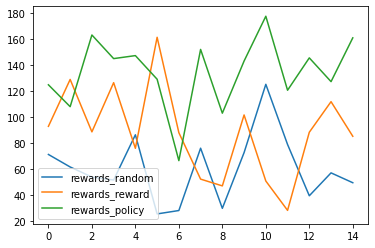

In [ ]:
rewards_random, rewards_reward, rewards_policy = compare(15)